In [1]:
import pandas as pd
import numpy as np
import glob
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# !apt-get -qq install -y fonts-nanum
# !fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# import matplotlib.pyplot as plt
# plt.rc('font', family='NanumGothic')

Selecting previously unselected package fonts-nanum.
(Reading database ... 120874 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory det

In [2]:
base_path = r'/content/drive/MyDrive/Project/HD_AI_Challenge 본선/qhstjs/train'
train_paths = glob.glob(os.path.join(base_path, '*.csv'))

In [3]:
# 파일 이름에서 target 값을 추출
def load_data(file_path):
    file_name = os.path.basename(file_path)
    target_value = re.match(r'(\d+)kg_\w+\.csv', file_name).group(1)

    loaded_data = pd.read_csv(file_path)

    loaded_data['Target'] = int(target_value)
    return loaded_data

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 전체 데이터 concat해서 진행

In [4]:
all_data = pd.concat([load_data(f) for f in train_paths])

print(all_data.isnull().sum())
print(all_data.describe())

Time[s]     0
Signal A    0
Signal B    0
Signal C    0
Sensor A    0
Sensor B    0
Sensor C    0
Sensor D    0
Target      0
dtype: int64
             Time[s]       Signal A       Signal B       Signal C  \
count  192437.000000  192437.000000  192437.000000  192437.000000   
mean       65.360348     318.369341     315.551481     316.074637   
std        46.244659       9.309353       7.254486       5.276575   
min         0.000000     299.248911     292.501714     296.703368   
25%        30.060000     311.234942     311.480893     316.071968   
50%        60.130000     316.071968     316.071968     316.071968   
75%        90.200000     325.627777     321.441887     316.071968   
max       244.750000     339.642222     332.253005     339.642222   

            Sensor A       Sensor B       Sensor C       Sensor D  \
count  192437.000000  192437.000000  192437.000000  192437.000000   
mean      648.706509     358.875064     364.243630     542.521511   
std        63.731852      47.026

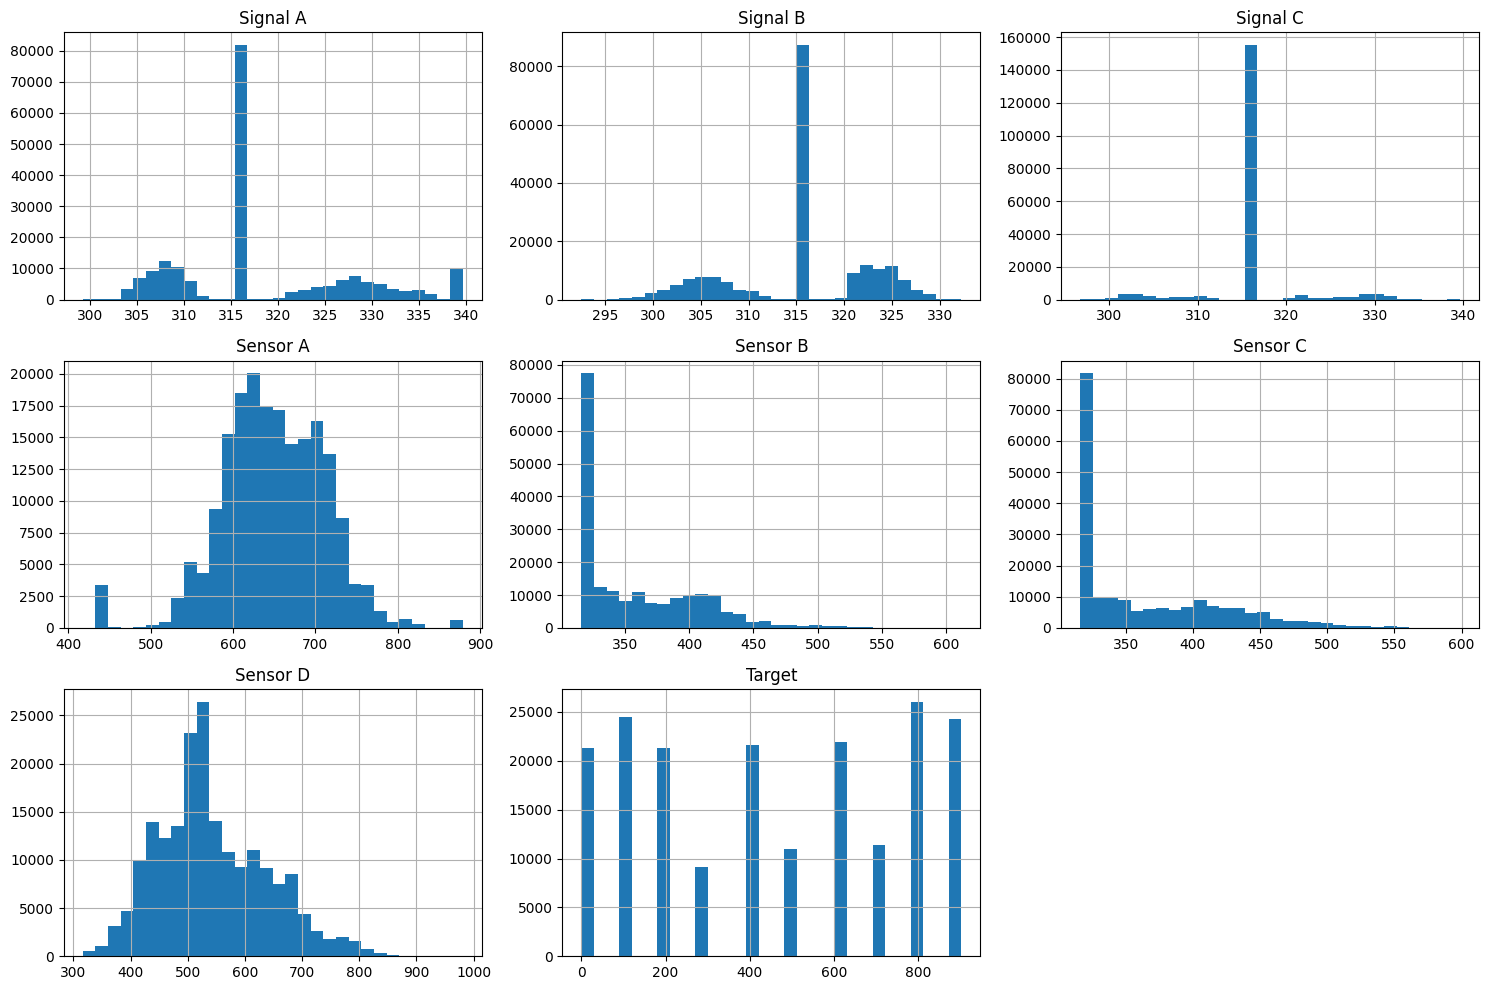

In [13]:
columns_to_plot = ['Signal A', 'Signal B', 'Signal C', 'Sensor A', 'Sensor B', 'Sensor C', 'Sensor D', 'Target']
all_data[columns_to_plot].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

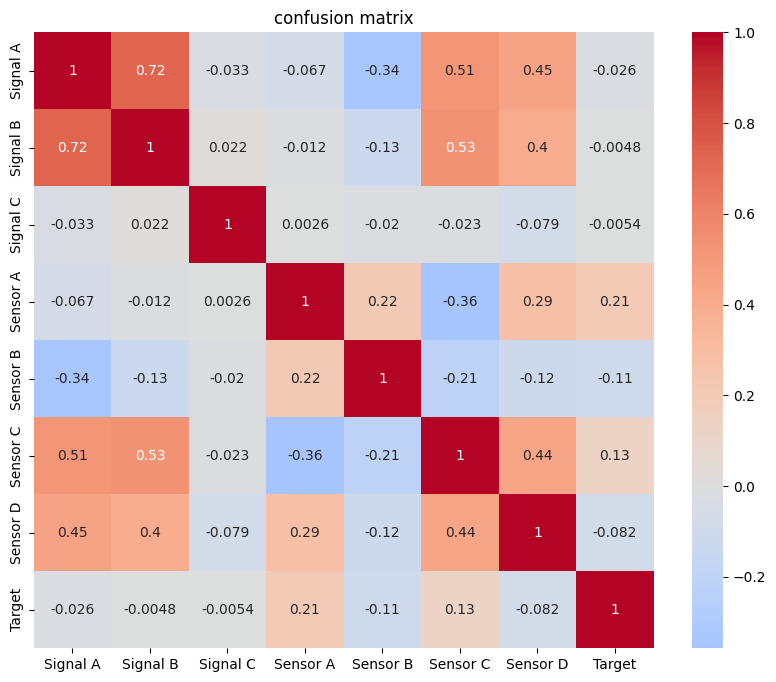

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(all_data[columns_to_plot].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('confusion matrix')
plt.show()

## 개별 데이터

In [15]:
for file_path in train_paths:
    data = load_data(file_path)
    file_name = os.path.basename(file_path)

    columns_to_plot = ['Signal A', 'Signal B', 'Signal C', 'Sensor A', 'Sensor B', 'Sensor C', 'Sensor D']
    data[columns_to_plot].hist(bins=30, figsize=(15, 10))
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 10))
    sns.heatmap(data[columns_to_plot].corr(), annot=True, cmap='coolwarm', center=0)
    plt.title(f'{file_name}')
    plt.tight_layout()
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [5]:
for file_path in train_paths:
    data = load_data(file_path)
    file_name = os.path.basename(file_path)

    # 시간에 따른 센서 값들의 변화를 플롯합니다
    time_col = data.columns[0]
    sensor_cols = ['Signal A', 'Signal B', 'Signal C', 'Sensor A', 'Sensor B', 'Sensor C', 'Sensor D']

    plt.figure(figsize=(15, 15))
    for sensor in sensor_cols:
        plt.plot(data[time_col], data[sensor], label=sensor)
    plt.xlabel('Time')
    plt.ylabel('Sensor Values')
    plt.title(f'Sensor Values Over Time for {file_name}')
    plt.legend()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4363 (\N{HANGUL CHOSEONG IEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4462 (\N{HANGUL JUNGSEONG U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4523 (\N{HANGUL JONGSEONG NIEUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4364 (\N{HANGUL CHOSEONG CIEUC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4453 (\N{HANGUL JUNGSEONG EO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

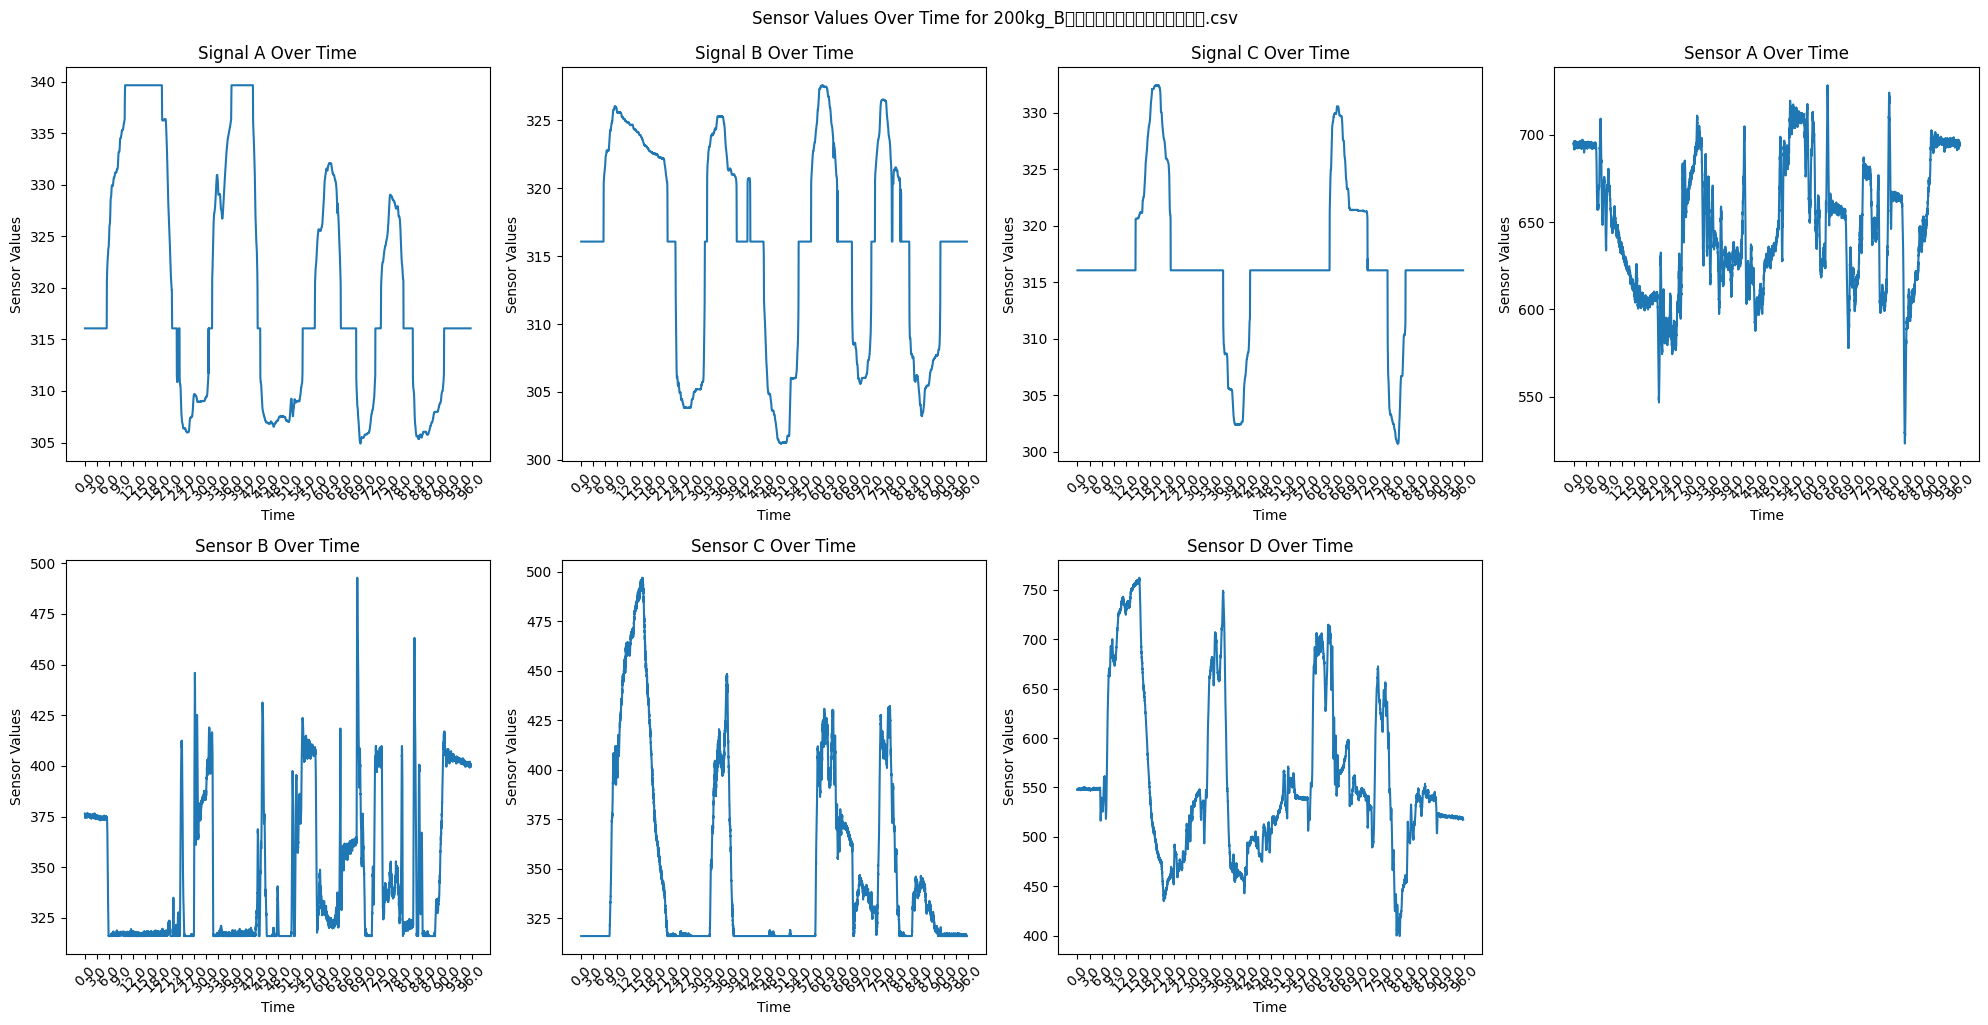

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4363 (\N{HANGUL CHOSEONG IEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4462 (\N{HANGUL JUNGSEONG U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4523 (\N{HANGUL JONGSEONG NIEUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4364 (\N{HANGUL CHOSEONG CIEUC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4453 (\N{HANGUL JUNGSEONG EO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

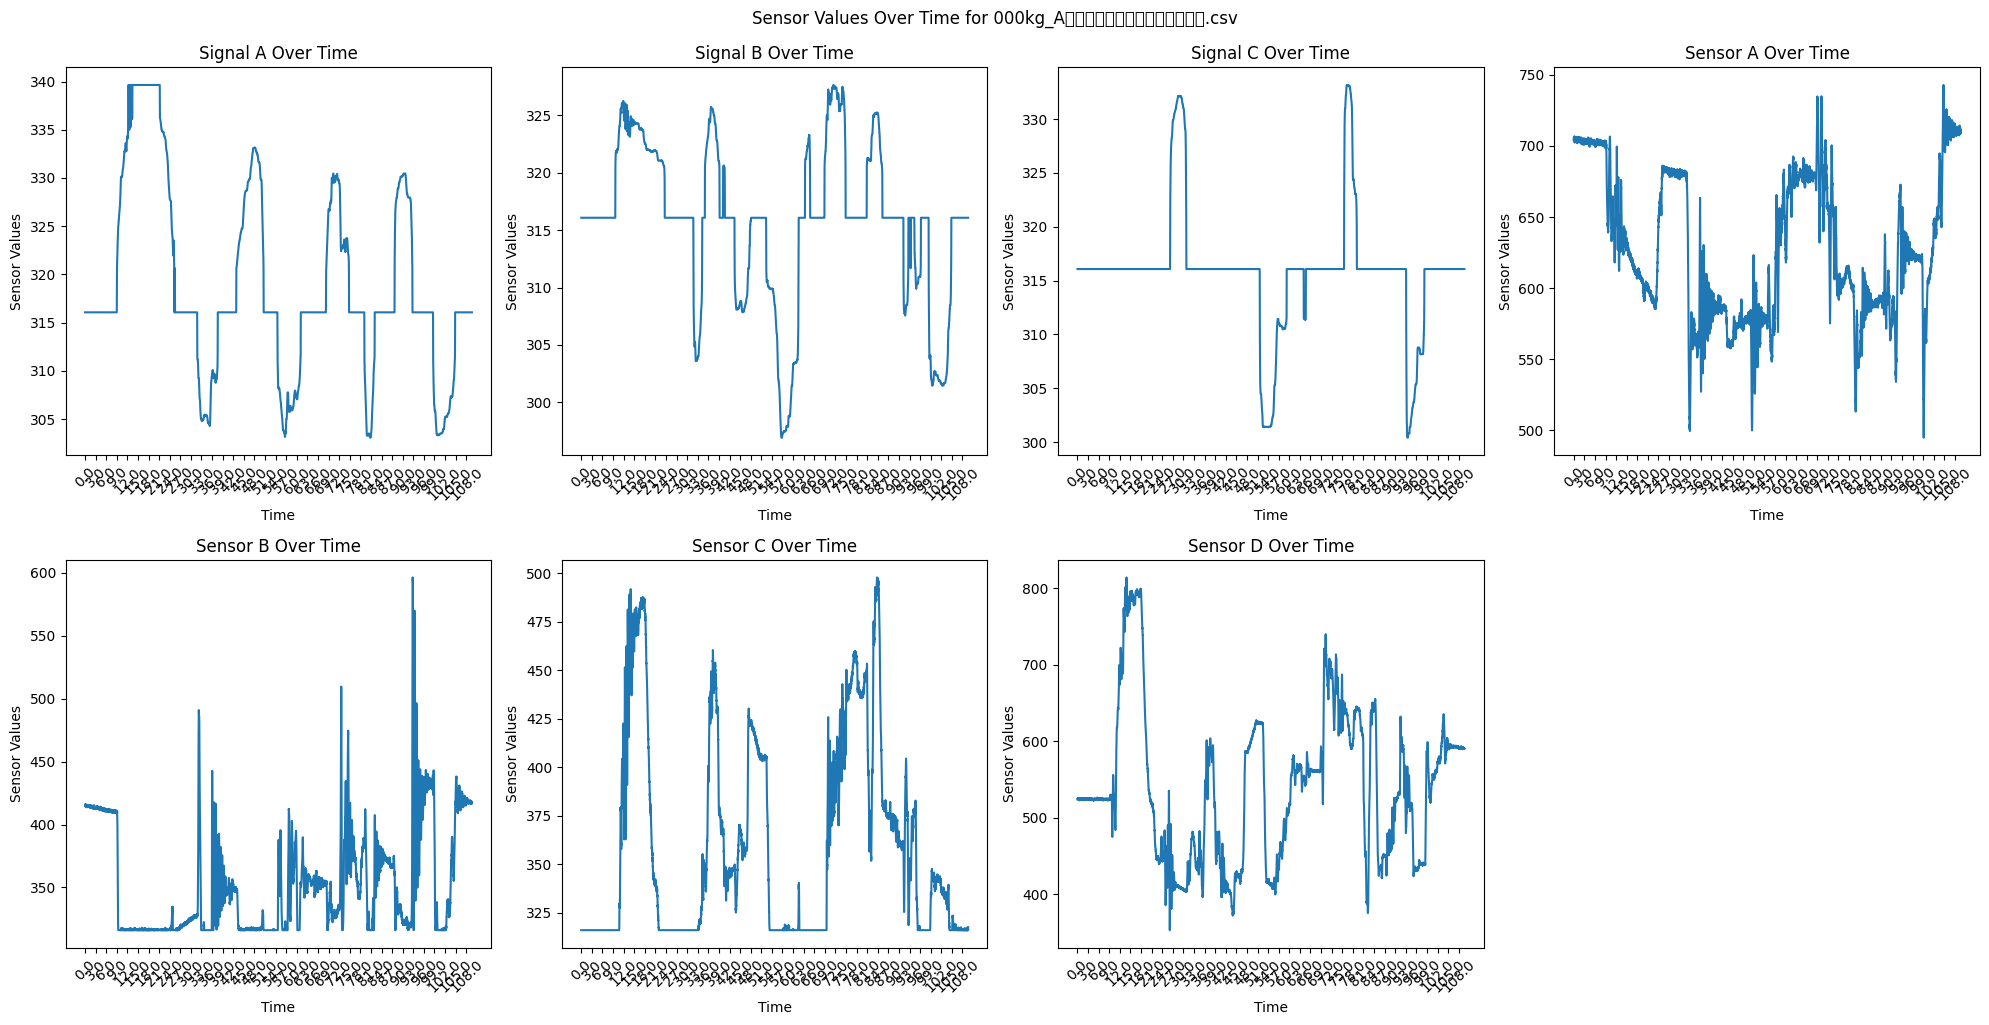

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4363 (\N{HANGUL CHOSEONG IEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4462 (\N{HANGUL JUNGSEONG U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4523 (\N{HANGUL JONGSEONG NIEUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4364 (\N{HANGUL CHOSEONG CIEUC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4453 (\N{HANGUL JUNGSEONG EO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

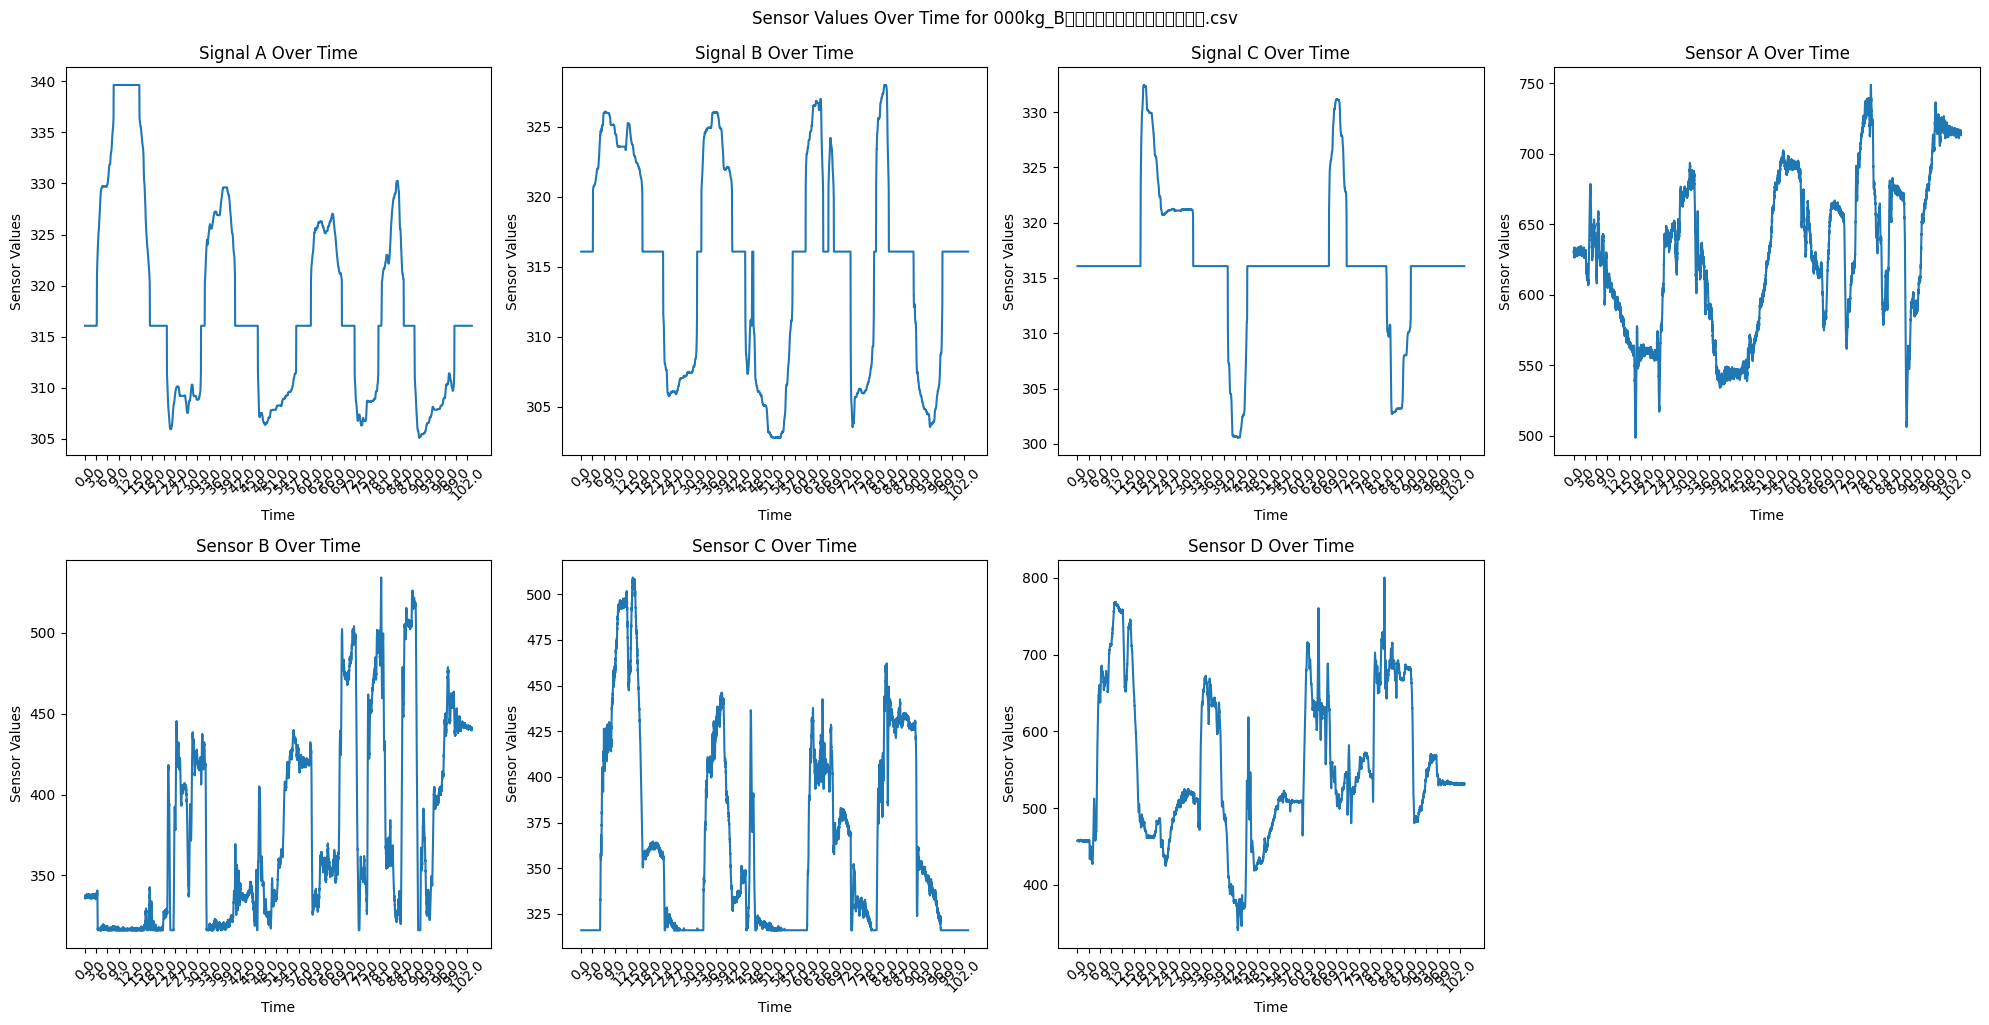

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4363 (\N{HANGUL CHOSEONG IEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4462 (\N{HANGUL JUNGSEONG U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4523 (\N{HANGUL JONGSEONG NIEUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4364 (\N{HANGUL CHOSEONG CIEUC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4453 (\N{HANGUL JUNGSEONG EO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

In [ ]:
for file_path in train_paths:
    data = load_data(file_path)
    file_name = os.path.basename(file_path)

    # 시간에 따른 센서 값들의 변화를 플롯합니다
    time_col = data.columns[0]
    sensor_cols = ['Signal A', 'Signal B', 'Signal C', 'Sensor A', 'Sensor B', 'Sensor C', 'Sensor D']

    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()

    for i, sensor in enumerate(sensor_cols):
        ax = axes[i]
        ax.plot(data[time_col], data[sensor])
        ax.set_xlabel('Time')
        ax.set_ylabel('Sensor Values')
        ax.set_title(f'{sensor} Over Time')

        # x축 눈금 조절과 회전 추가
        ax.set_xticks(np.arange(min(data[time_col]), max(data[time_col])+1, step=3))
        ax.set_xticklabels(ax.get_xticks(), rotation=45)

    # 사용하지 않는 축 숨기기
    for j in range(len(sensor_cols), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.suptitle(f'Sensor Values Over Time for {file_name}', y=1.02)
    plt.show()

<Figure size 800x600 with 0 Axes>

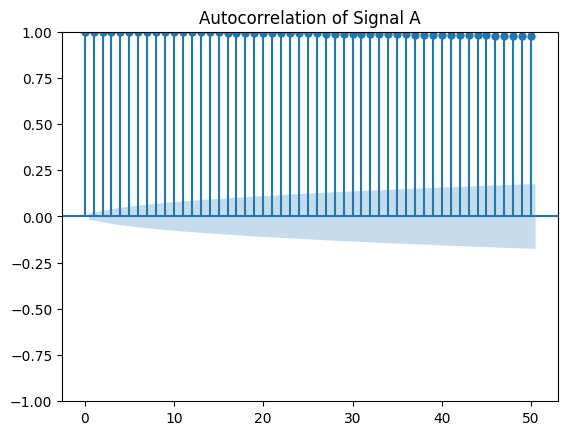

<Figure size 800x600 with 0 Axes>

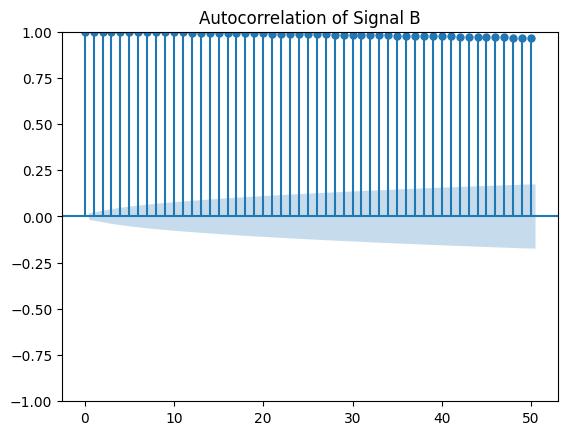

<Figure size 800x600 with 0 Axes>

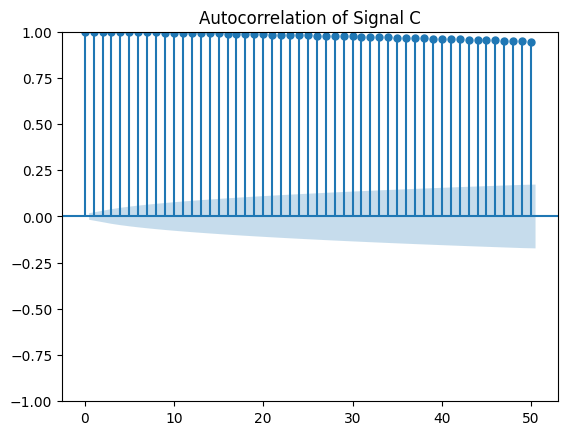

<Figure size 800x600 with 0 Axes>

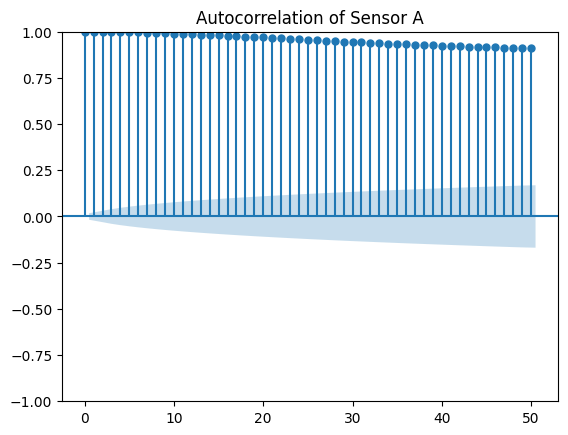

<Figure size 800x600 with 0 Axes>

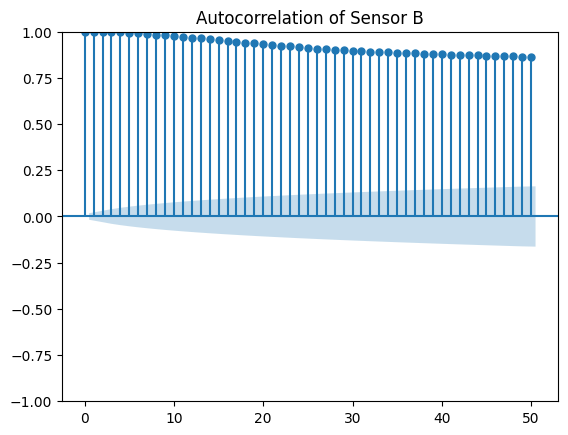

<Figure size 800x600 with 0 Axes>

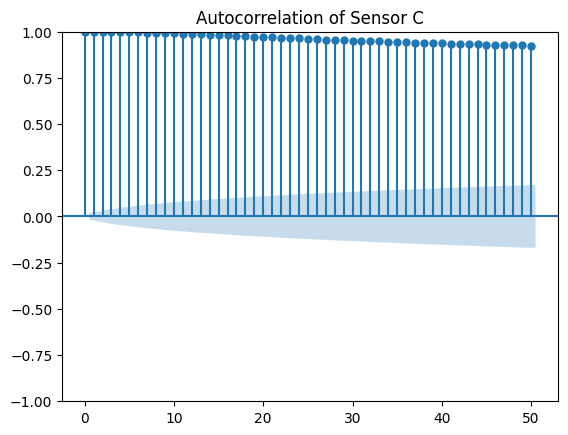

<Figure size 800x600 with 0 Axes>

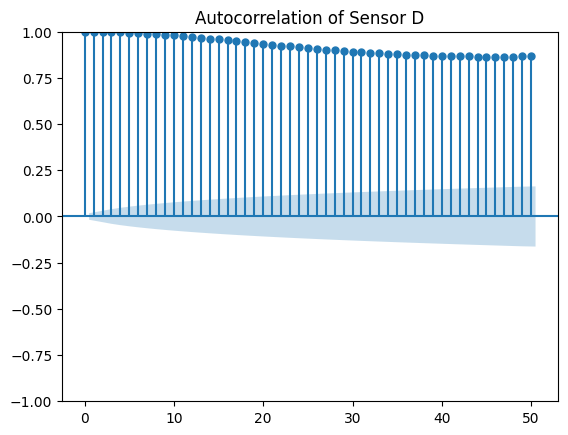

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

for sensor in sensor_cols:
    plt.figure(figsize=(8, 6))
    plot_acf(data[sensor], lags=50)
    plt.title(f'Autocorrelation of {sensor}')
    plt.show()

In [ ]:
for file_path in train_paths:
    data = load_data(file_path)
    file_name = os.path.basename(file_path)

    # 시간에 따른 센서 값들의 변화를 플롯합니다
    time_col = data.columns[0]
    sensor_cols = ['Signal A', 'Signal B', 'Signal C']

    plt.figure(figsize=(15, 15))
    for sensor in sensor_cols:
        plt.plot(data[time_col], data[sensor], label=sensor)
    plt.xlabel('Time')
    plt.ylabel('Sensor Values')
    plt.title(f'Sensor Values Over Time for {file_name}')
    plt.legend()
    plt.show()

In [ ]:
for file_path in train_paths:
    data = load_data(file_path)
    file_name = os.path.basename(file_path)

    # 시간에 따른 센서 값들의 변화를 플롯합니다
    time_col = data.columns[0]
    sensor_cols = ['Sensor A', 'Sensor B', 'Sensor C', 'Sensor D']

    plt.figure(figsize=(15, 15))
    for sensor in sensor_cols:
        plt.plot(data[time_col], data[sensor], label=sensor)
    plt.xlabel('Time')
    plt.ylabel('Sensor Values')
    plt.title(f'Sensor Values Over Time for {file_name}')
    plt.legend()
    plt.show()